In [67]:
import umap

In [68]:
import pandas as pd

In [69]:
import numpy as np

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

In [71]:
training_set_fingerprint_address='../../../../results/compound_exploration/[M+H]+_metlin_fingerprints.bin'

In [72]:
training=pd.read_pickle(training_set_fingerprint_address)

In [73]:
training

InChIKey  \
0     UQTZMGFTRHFAAM-UHFFFAOYSA-N   
1     RLAWWYSOJDYHDC-UHFFFAOYSA-N   
2     BAWFJGJZGIEFAR-UHFFFAOYSA-N   
3     BKRGVLQUQGGVSM-UHFFFAOYSA-N   
4     LSQZJLSUYDQPKJ-UHFFFAOYSA-N   
...                           ...   
4049  PMMQOFWSZRQWEV-UHFFFAOYSA-N   
4050  XZFSMUXVAYCHFO-UHFFFAOYSA-N   
4051  RLNIWODKAMVILO-UHFFFAOYSA-N   
4052  NNJVILVZKWQKPM-UHFFFAOYSA-N   
4053  WRMRXPASUROZGT-UHFFFAOYSA-N   

                                     cactvs_fingerprint metlin_adduct_or_nist  \
0     1100000001110010001100000000000000000000000000...                [M+H]+   
1     1110000001111011001110000000000000000000000000...                [M+H]+   
2     1110000001111011101111000000001100000000000000...                [M+H]+   
3     1110000001111011101000000000000000000000000000...                [M+H]+   
4     1110000001111011001110000000000001000000000000...                [M+H]+   
...                                                 ...                   ...   
4049  1111000001111010001111000000000000000000000000...                [M+H]+   
4050  1111000001111111101100000000000000000000000000...                [M+H]+   
4051  1110000001110000001100000000000000000000000000...                [M+H]+   
4052  1110000001110011001000000000000000000000000000...                [M+H]+   
4053  1110000001110011001000000000000000000000000000...                [M+H]+   

             cid                                  fingerprint_array  
0         6272.0  [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...  
1         3937.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...  
2          925.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...  
3         3938.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...  
4         2171.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...  
...          ...                                                ...  
4049  10325960.0  [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...  
4050    641596.0  [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...  
4051  54273075.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...  
4052      3676.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...  
4053     24415.0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...  

[4040 rows x 5 columns]

In [74]:
X_metlin=np.array(training.fingerprint_array.to_list())

In [75]:
np.shape(X_metlin)

(4040, 881)

In [76]:
hcd_pos_nist_address='../../../../results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [77]:
hcd_pos_nist_panda=pd.read_pickle(hcd_pos_nist_address)

In [78]:
hcd_pos_nist_panda=hcd_pos_nist_panda.reset_index()

In [79]:
X_nist=np.array(hcd_pos_nist_panda.fingerprint_array.to_list())

In [80]:
np.shape(X_nist)

(8298, 881)

In [81]:
X=np.vstack((X_metlin,X_nist))

In [82]:
np.shape(X)

(12338, 881)

In [83]:
n_neighbors=10
min_dist=0.05
n_components=2
metric='jaccard'

In [84]:
my_UMAP=umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=1337    
)

In [85]:
my_fingerprints_embeded=my_UMAP.fit_transform(X)

/home/rictuar/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [86]:
cheap_colors=['red' for i in range(4040)] + ['r' for i in range(8298)]
expensive_colors=['red' for i in range(4040)] + [cm.viridis(1-hcd_pos_nist_panda.at[i,'dot_product']) for i in range(8298)]

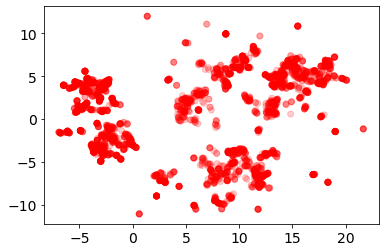

In [87]:
plt.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.2
)

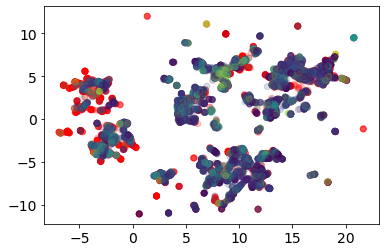

In [88]:
plt.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.2
)
plt.scatter(
    my_fingerprints_embeded[4040:,0],
    my_fingerprints_embeded[4040:,1],
    c=expensive_colors[4040:],
    alpha=0.2
)

In [89]:

s=10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']=14
fig,ax=plt.subplots(2,1,figsize=(6.69292, 12),dpi=1200,facecolor='w')
ax[0].set_title('Training Set')
ax[0].scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.1,
    s=s
)
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
# norm=mpl.colors.Normalize(vmin=0,vmax=0)
# sm=plt.cm.ScalarMappable(cmap=plt.get_cmap('red'),norm=norm)
# plt.colorbar(sm,label='Dot Product',ax=ax[0])
ax[1].set_title('Training Set and NIST Subset')
ax[1].scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    c=cheap_colors[0:4040],
    alpha=0.1,
    s=s#,
    #cmap=plt.get_cmap('viridis')
)
ax[1].scatter(
    my_fingerprints_embeded[4040:,0],
    my_fingerprints_embeded[4040:,1],
    c=expensive_colors[4040:],
    alpha=0.3,
    s=s#,
    #cmap=plt.get_cmap('viridis')
)
norm=mpl.colors.Normalize(vmin=0,vmax=1)
sm=plt.cm.ScalarMappable(cmap=plt.get_cmap('viridis'),norm=norm)
plt.colorbar(sm,label='Dot Product',ax=ax[1])
#fig.suptitle('Predictive Model Confusion Matrices')
#fig.supylabel('Actual Class')
#fig.supxlabel('Predicted Class')
##plt.savefig('/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/final_figures/submitted_to_manuscript/umap_m+h_hcd_vs_training.png',
##           facecolor=fig.get_facecolor())
plt.show()
#plt.savefig('/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/final_figures/submitted_to_manuscript/umap_m+h_hcd_vs_training.eps')

IndexError: index 2 is out of bounds for axis 1 with size 2

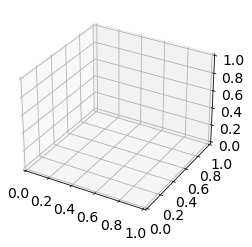

In [44]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(
    my_fingerprints_embeded[0:4040,0],
    my_fingerprints_embeded[0:4040,1],
    my_fingerprints_embeded[0:4040,2],
    c=cheap_colors[0:4040],
    alpha=0.2
)

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
# ax.scatter(
#     my_fingerprints_embeded[0:4040,0],
#     my_fingerprints_embeded[0:4040,1],
#     my_fingerprints_embeded[0:4040,2],
#     c=cheap_colors[0:4040],
#     alpha=0.2
# )
ax.scatter(
    my_fingerprints_embeded[4040:,0],
    my_fingerprints_embeded[4040:,1],
    my_fingerprints_embeded[4040:,2],
    c=expensive_colors[4040:],
    alpha=0.2
)